In [191]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading the data set into a Pandas DataFrame. And show the first five rows of the data set.

In [192]:
df = pd.read_csv('./car data.csv')
df=df.drop(["Car_Name","Fuel_Type","Seller_Type","Transmission","Owner"],axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven
0,2014,3.35,5.59,27000
1,2013,4.75,9.54,43000
2,2017,7.25,9.85,6900
3,2011,2.85,4.15,5200
4,2014,4.60,6.87,42450


# Showing the description and the info of the data set.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 9.5 KB


In [194]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


In [195]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.000000,0.236141,-0.047584,-0.524342
Selling_Price,0.236141,1.000000,0.878983,0.029187
Present_Price,-0.047584,0.878983,1.000000,0.203647
Kms_Driven,-0.524342,0.029187,0.203647,1.000000


# Using a regression model, splitting the data into train and test data.

In [196]:
X = df['Present_Price']
X = np.array(X).reshape(-1,1)
X[0:5]

array([[5.59],
       [9.54],
       [9.85],
       [4.15],
       [6.87]])

In [197]:
Y = df['Selling_Price']
Y = np.array(Y)
Y[0:5]

array([3.35, 4.75, 7.25, 2.85, 4.6 ])

In [198]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Fitting the training split to the regression model.

In [199]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [200]:
y_predict = lm.predict(x_test)

y_predict[0:5]

array([1.12951494, 4.21204814, 1.58618653, 1.71028207, 3.26892204])

Text(0.5, 1.0, 'Price Difference Model')

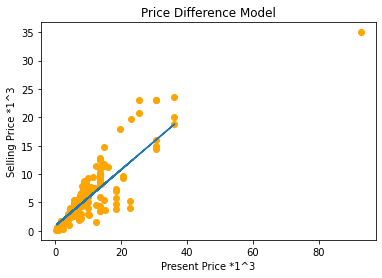

In [201]:
plt.scatter(x_train,y_train, color='orange')
plt.plot(x_test,y_predict)
plt.xlabel("Present Price *1^3")
plt.ylabel("Selling Price *1^3")
plt.title("Price Difference Model")

# Showing the regression model’s score.

In [202]:
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100, 2)}%")
print(f"Test accuracy {round(lm.score(x_test, y_predict) * 100, 2)}%")

Train accuracy 79.06%
Test accuracy 100.0%


# R^2 formula which measure the model fit.

In [203]:
from sklearn.metrics import r2_score
R2=round(r2_score(y_test, y_predict),3)
print(f"R^2 :{R2}")

R^2 :0.695


# Conclusions:

1- The data set I used don't have a none value and we could know that from the description.

2- I found a high correlation between "Selling Price" and "Present Price". I didn't use the Date because it has a very low correlation with other categories.

3- The model represent an "Optimal Fit". We could know that from the R^2 formula.